In [3]:
import numpy as np
import pandas as pd
import lasio
import matplotlib.pyplot as plt
from sys import exit

%matplotlib inline

#set home directory for python scripts
%cd C:\Users\joanna.wallis\Documents\Github\FORCE\Public\


from FRM_apply import fluid_substitution
from FRM_function import  HS_2_phase_L, fluids_calc, reuss_fluids, sat, dry_rock, fluid_sub_k, rho_dry_calc, multiple_FRM, calc_vp_vs
from fluid import batzle_wang

# set to True to review bounds on dry rock properties, False to continue to fluid sub
# Recommended: select bounds first by setting this to True, running, and setting k_phi_const_max and k_phi_const_min below
check_bounds_only = True 

# set to False to prevent chart display, True to see charts
show_charts = False

# set to True to save las files (overwriting any existing las files), False to not save calculated las files
save_las = True

# set to True to save charts as png files (overwriting any existing charts), False to not save charts
save_fig = True

C:\Users\joanna.wallis\Documents\Github\FORCE\Public


In [4]:
# set root for las files
root = r'C:\Users\joanna.wallis\Documents\FORCE_presentation\example_well_log'

# set log names in las file
# module expects: measured depth, Vp (m/s), Vs(m/s), RhoB (g/cc), Vsh (frac), Sw (frac) and PhiE (frac)
#Capitals and spelling is IMPORTANT!
depth_las = "DEPTH"
vp_las = "Vp"
vs_las = "Vs"
rhob_las = "RhoB"
phie_las = "PhiE"
vsh_las = "Vsh"
sw_las = "Sw"
# location of fluid sub parameters file
parameters_file = r'C:\Users\joanna.wallis\Documents\FORCE_presentation\example_well_log\FRM_parameters_example.txt'

# list of well names
wells = ["WELL"] # output saturations as a list in square brackets
# define null value 
null = -999.25

output_sw = [0.05, 0.3, 0.95, 1] # output saturations in frac as a list in square brackets. This is Sw i.e. Sw = (1 - Shc)
output_fluid = 'oil' # 'oil' or 'gas'. For brine, just set output sw to 1
scenarios = ["95OIL", "70OIL", "05OIL", "100WTR"] # for output las filenames. Should be ordered as output_sw above

print("cell complete")

cell complete


In [5]:
#fluid sub cutoffs
frm_max_vsh = 1#0.3 #max Vsh to apply FRM to
frm_min_phie = 0 #0.08 # min phie to apply FRM to
frm_max_phie = 1 #max phie to apply FRM to
frm_min_pr = 0.1
# NB the min/max MD for the fluid sub is set via the "ZOI" columns in the FRM parameters file

print("cell complete")

cell complete


In [6]:
# define mineral properties

#Clay parameters
factor = 1 # universal factor to modify clay parameters
mu_clay = 4.72 * pow(10, 9) * factor # Shear modulus of clay in Pa
k_clay = 14.66 * pow(10, 9) * factor # Bulk modulus of clay in Pa
rho_clay = 2.48 * pow(10, 3) * factor #Density of clay in kg/m^3

# Quartz parameters
mu_qtz = 45.0 * pow(10, 9)  # Shear modulus of quartz in Pa
k_qtz = 37.0 * pow(10, 9)  # Bulk modulus of quartz in Pa
rho_qtz = 2.65 * pow(10, 3)  #Density of quartz in kg/m^3

print("cell complete")

cell complete


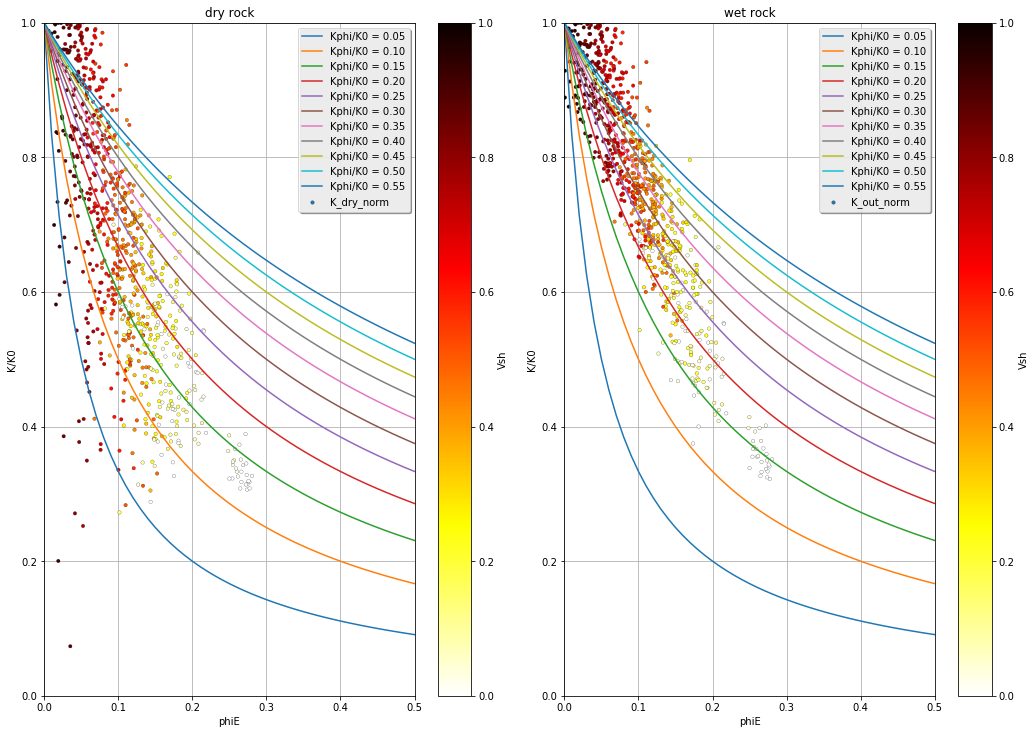

SystemExit: Check Bounds Only = True

C:\Users\joanna.wallis\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
# run FRM to check dry rock bounds
fluid_substitution(wells, root, check_bounds_only = True, show_charts = True, save_las = False, save_fig = True)

# expect a user warning, as check_bounds_early = True causes the script to terminate before the full fluid sub.

In [8]:
#set dry rock model bounds from previous charts
k_phi_const_max = 0.3 #Upper bound on the dry rock model (picked from graph)
k_phi_const_min = 0.1 #Lower bound on the dry rock model (picked from graph)

print("cell complete")

cell complete


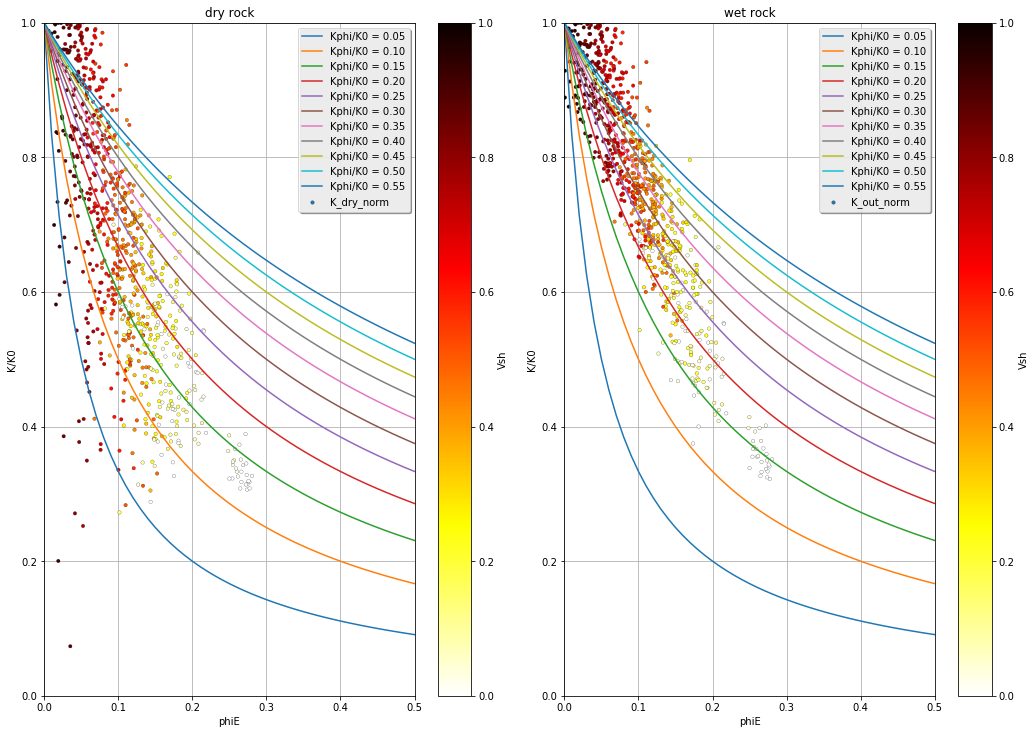

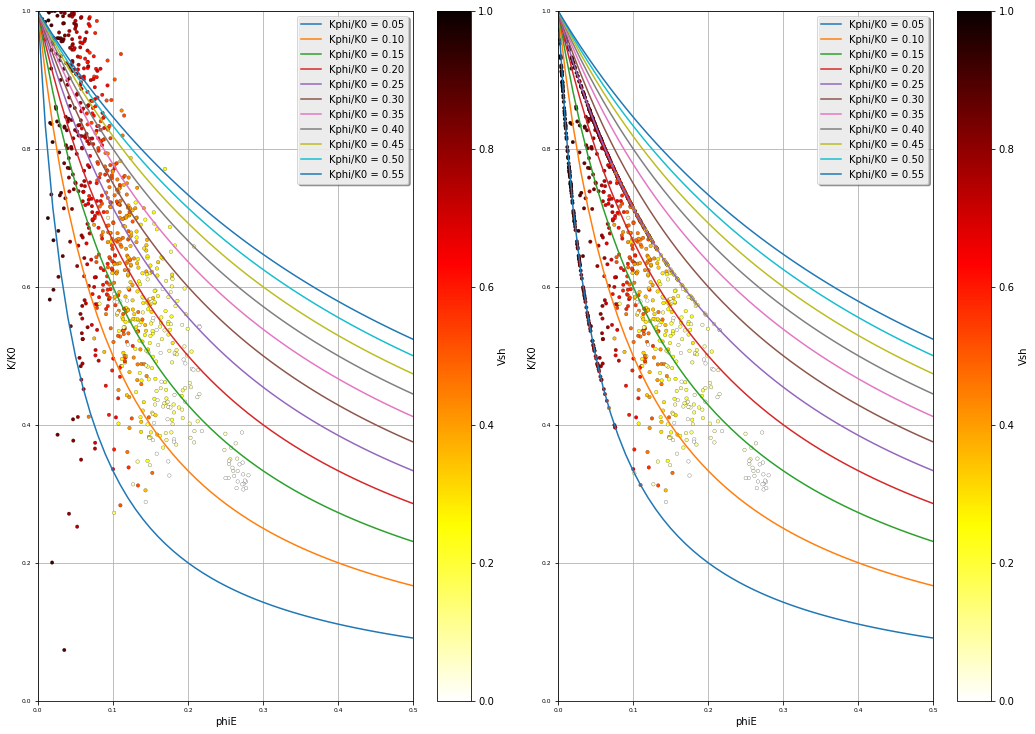

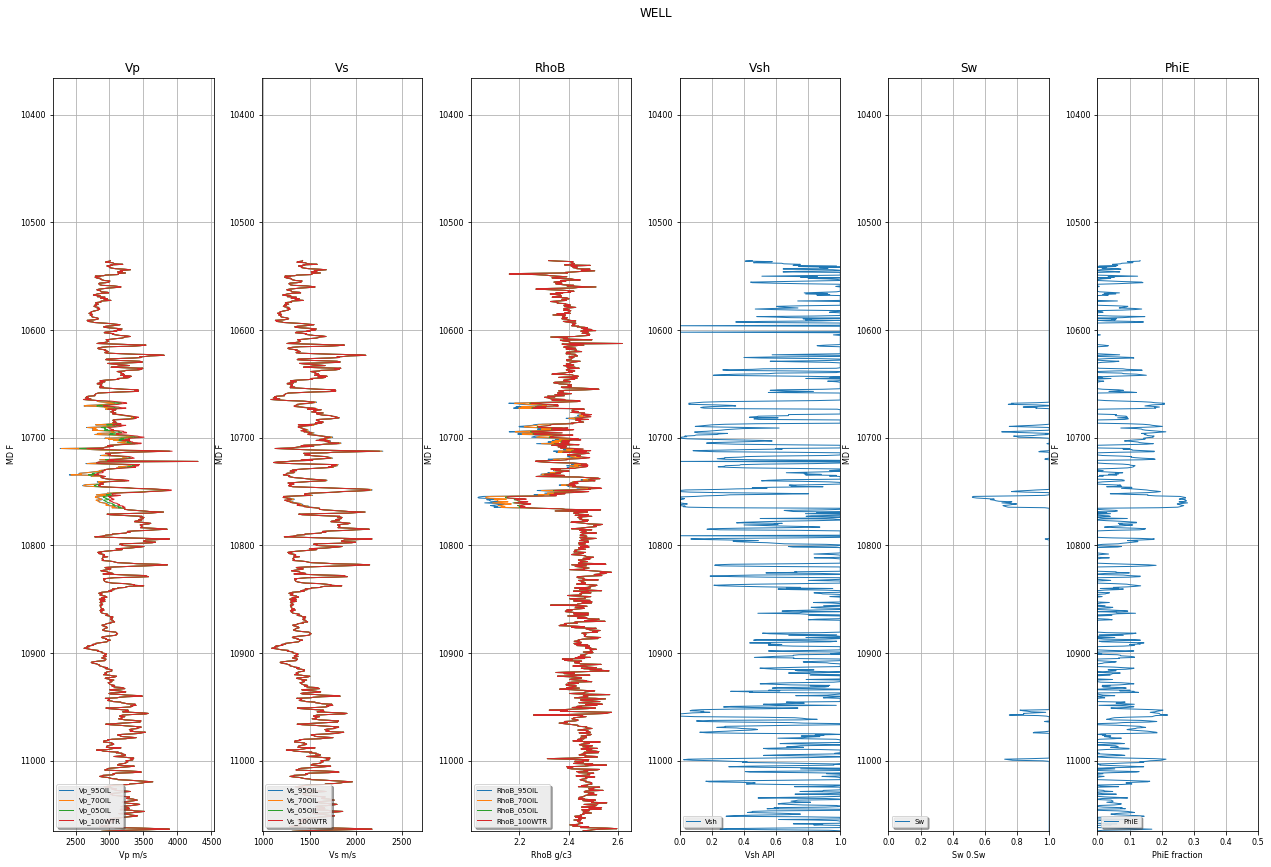

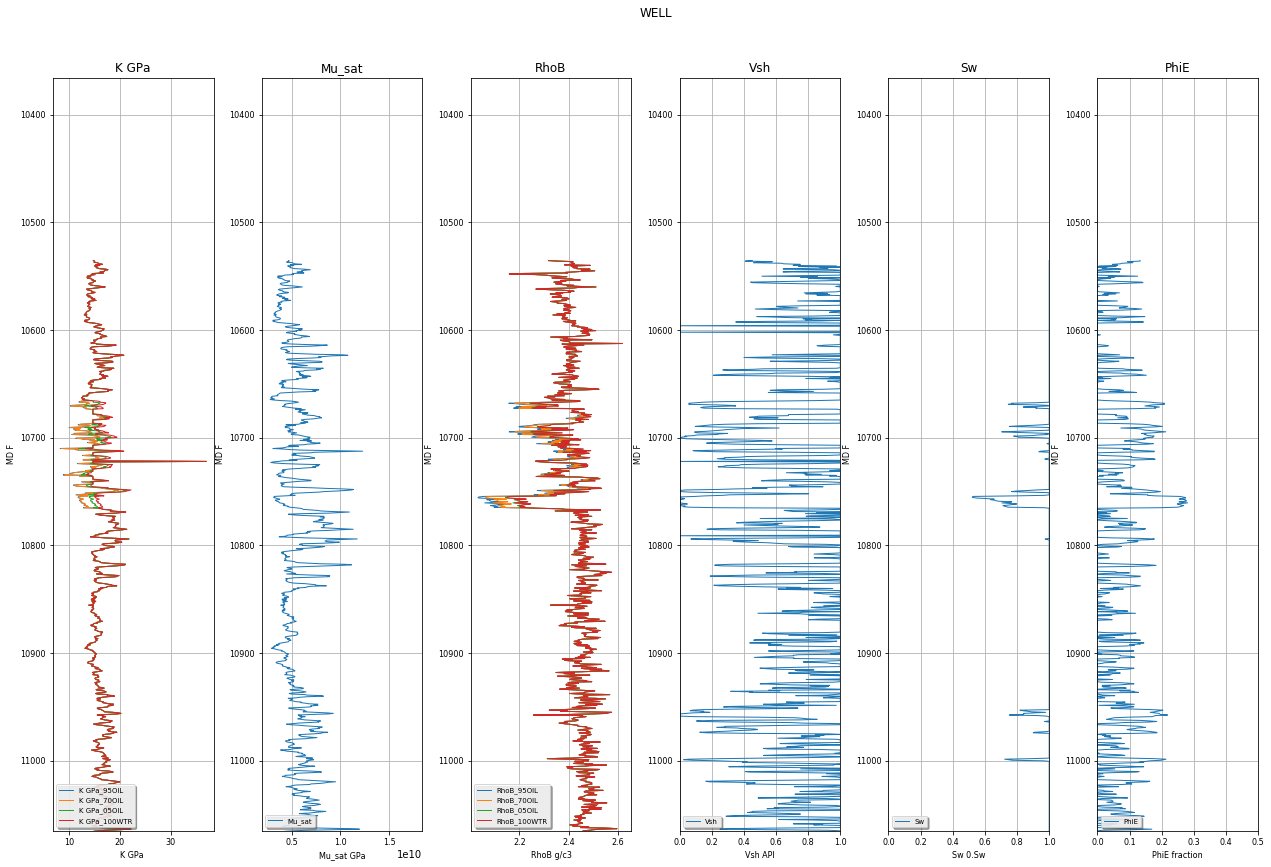

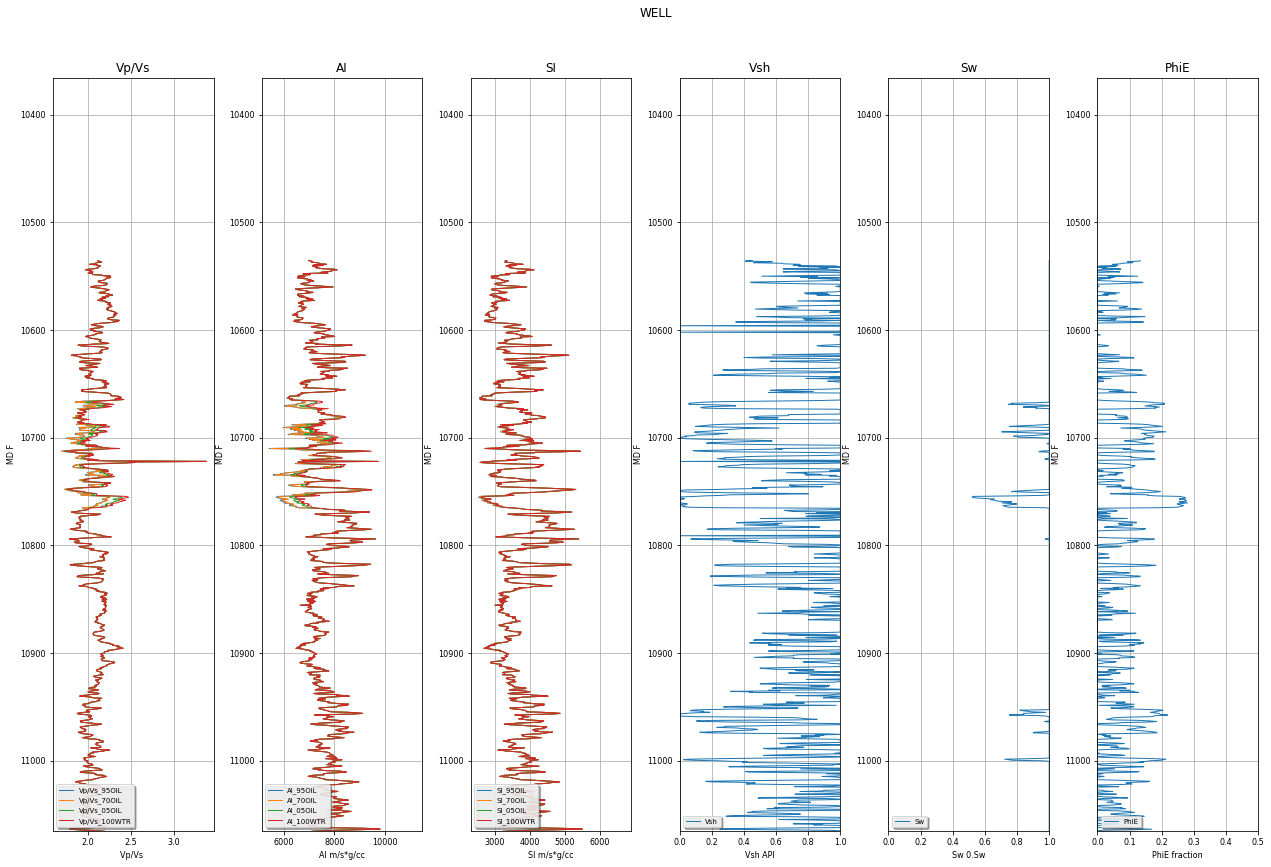

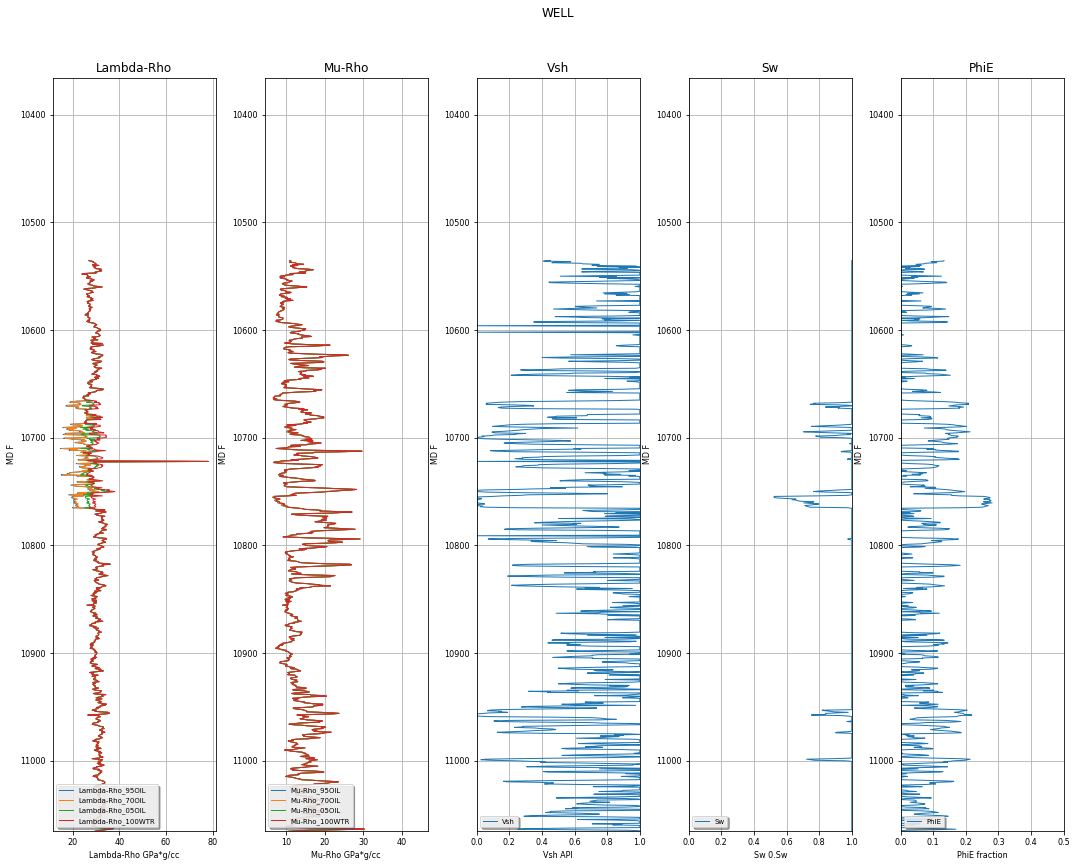

In [9]:
# run fluid sub with dry rock model

output_filenames = fluid_substitution(wells, root, check_bounds_only = False, show_charts = True, save_las = True, save_fig = True)

In [11]:
print ("Output Las Files")
for file in output_filenames:
    print (file + "\n")


Output Las Files
C:\Users\joanna.wallis\Documents\FORCE_presentation\example_well_log\WELL_95OIL.las

C:\Users\joanna.wallis\Documents\FORCE_presentation\example_well_log\WELL_70OIL.las

C:\Users\joanna.wallis\Documents\FORCE_presentation\example_well_log\WELL_05OIL.las

C:\Users\joanna.wallis\Documents\FORCE_presentation\example_well_log\WELL_100WTR.las

